In [91]:
# Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

# Leemos los datos
datos_1 = pd.read_csv('1.csv', header=1)
datos_2 = pd.read_csv('2.csv',header=1)
datos_3 = pd.read_csv('3.csv',header=1)
datos_4 = pd.read_csv('4.csv',header=1)
datos_5 = pd.read_csv('5.csv', header=1)



In [92]:
# Ponemos todos los datos en un mismo dataframe
datos_crudos = pd.concat([datos_1,datos_2,datos_3,datos_4,datos_5])

In [93]:
# Convertimos las fecha en un formato más fácil de manejar 
datos_crudos['Fecha de inicio'] = pd.to_datetime(datos_crudos['Fecha de inicio'])
datos_crudos['Fecha final'] = pd.to_datetime(datos_crudos['Fecha final'])
datos_crudos['Fecha registrada'] = pd.to_datetime(datos_crudos['Fecha registrada'])


# Imprimimos los datos crudos
datos_crudos.head()


,Fecha de inicio,Fecha final,Tipo de respuesta,Dirección IP,Progreso,Duración (en segundos),Finalizado,Fecha registrada,ID de respuesta,Apellido del destinatario,...,OSF,CRN,Nombre del destinatario,Correo electrónico del destinatario,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:,Nombre de Experiencia,Periodo,Tipo de Formato,Matrícula con A0XXXXXXX:,Semana
0,2021-04-22 13:24:00,2021-04-22 13:26:00,Survey Preview,NaN,100,132,True,2021-04-22 13:26:00,R_12tdDn1LDz4BmzD,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-22 17:35:00,2021-04-22 17:38:00,IP Address,187.153.66.173,100,207,True,2021-04-22 17:38:00,R_3nBhoMQcs4l6UzN,NaN,...,León Ortigosa ABP,26892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-22 18:31:00,2021-04-22 18:34:00,IP Address,187.189.141.187,100,168,True,2021-04-22 18:34:00,R_3CT33YuqT2viJVr,NaN,...,"Comenzar de Nuevo, A.C.",26918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-23 04:47:00,2021-04-23 04:53:00,IP Address,45.238.188.41,100,349,True,2021-04-23 04:53:00,R_2Vr6CJ6upwFerdf,NaN,...,"Casa Paterna La Gran Familia, A.C.",26913.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-23 07:45:00,2021-04-23 07:49:00,IP Address,189.152.158.35,100,245,True,2021-04-23 07:49:00,R_cTjIZnPkeIWYVUZ,NaN,...,"Programa de Acompañamiento de Servicio Social,...",26933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1) Comprensión de los datos del negocio:

a) Dimensión del dataset. Indica cantidad de registros y columnas

In [94]:
n = len(datos_crudos)
n_columns = len(datos_crudos.columns)

print('Número de instancias en los datos crudos: ', n)
print('Número de columnas en el dataset : ', n_columns)

columnas = datos_crudos.columns 


Número de instancias en los datos crudos:  10499
Número de columnas en el dataset :  43


b) Describe claramente cada uno de los datos, incluyendo su nombre, descripción, tipo 

In [95]:
# Tipos de los datos con su nombre de columna:
lista_tipos = datos_crudos.dtypes
lista_tipos

Fecha de inicio                                                                                                                                                                                                                                                                                                                                                                                                                     datetime64[ns]
Fecha final                                                                                                                                                                                                                                                                                                                                                                                                                         datetime64[ns]
Tipo de respuesta                                                                                                                 

### Descripcion de las columnas: 
- Fecha inicio: Fecha y hora en la que el estudiante ingreso a la encuesta.Numérico (time-stamp)
- Fecha final: Fecha y hora en la que el estudiante terminó la encuesta. Numérico (time-stamp)
- Tipo de respuesta: Desde dónde contestó la encuesta. Categórico.
- Dirección IP: Contiene la dirección IP del dispositivo del estudiante en donde realizó la encuesta. Categórico.
- Progreso: El porcentaje de la encuesta en términos de avance que el estudiante completo. Numérico.
- Duración (en segundos): Contiene cuántos segundos se tardó el estudiante en completar la encuesta. Numérico.
- Finalizado: Contiene un valor booleano, en caso de que el estudiante haya completado la encuesta es True, en cualquier otro caso False. Categórico.
- Fecha registrada: Contiene la fecha y hora en la que se envió la respuesta del estudiante. Numérico (time-stamp).
- ID de respuesta: Identificación de la encuesta . Categórico.
- Apellido del destinatario: Apellido del estudiante. Categórico.
- ID: Segunda identificación de la encuesta. Categórico.
- Datos de referencia externos: La columna no contiene nada 
- Latitud de ubicación: Latitud, a forma de coordenada de la ubicación del dispositivo en donde el estudiante tomó la encuesta. Numérico.
- Longitud de ubicación: Longitud, a forma de coordenada de la ubicación del dispositivo en donde el estudiante tomó la encuesta. Numérico.
- Canal de distribución: Cómo se contestó la encuesta. Categórico
- Idioma del usuario: Idioma de la encuesta. Categórico
- Preguntas de satisfacción (8): Son 8 preguntas, que buscan conocer acerca de la satisfacción del estudiante desde diferentes aspectos como responsabilidad, valores, etc. Categórico
- Preguntas de sí o no (retroalimentación / interesante )(2): Si la organización ofreció retroalimentación y si fue interesante. Categórico
- Comentario para compartir con la organización: Contiene un texto breve del estudiante para la organización. Categórico
- Preguntas de opinión (4): Preguntas sobre si el estudiante está de acuerdo con algunos enunciados sobre los valores y la ética. Categórico
- Comentario para compartir con el Tec: Breve texto del estudiante para el Tec sobre su experienica. Categórico.
- Tipo de comentario que hiciste: Categoría del comentario hecho sobre la experiencia. Categórico.
- OSF: Nombre de la organización socio formadora. Categórico
- CRN: Identificación del proyecto de servicio social. Categórico
- Nombre del destinatario: La columna está vacía. Categórico
- Correo electrónico del destinatario: La columna está vacía. Categórico
- OSF y nombre del proyecto: Nombre de la organización socio formadora y el proyecto en el que participó el estudiante. Categórico
- Nombre de la experiencia: Nombre del proyecto en el que participó el estudiante. Categórico.
- Periodo: Periodo en el que se realizó el proyecto. Categórico.
- Tipo de formato: Formato en el que se realizó el proyecto. Categórico.
- Matrícula con A0XXXXXXX: Contiene la matrícula del estudiante. Categórico.
- Semana: Modalidad en la que se realizó el proyecto. Categórico.


In [96]:
dic_valores_nu = {}
dic_tipos_datos= {} 
dic_valores_dif = {}
dic_valores_pos = {}

contador=0

# Intentamos hacer un diccionario con los tipos de cada columna de una manera automática.
for u in columnas:
    dic_valores_nu[u]= datos_crudos[u].isnull().sum()
    dic_valores_dif[u] = datos_crudos[u].nunique()
    
    if(dic_valores_dif[u] <= 5):
        dic_valores_pos[u] = datos_crudos[u].unique()
    elif(dic_valores_dif[u] > 5):
        dic_valores_pos[u] = datos_crudos[u].unique()
        
    if(lista_tipos[contador]=='object'):
        dic_tipos_datos[u] = 'categórico'
    elif(lista_tipos[contador]=='datetime64[ns]'):
        dic_tipos_datos[u] = 'numérico (time-stamp)'
    elif(lista_tipos[contador] in ['int64','float64']):
        dic_tipos_datos[u] = 'numérico'
    contador+=1
    

# Modificiamos manualmente algunas de los valores del diccionario tipos_datos porque algunos estaban mal:
dic_tipos_datos['Periodo']='categórico'
dic_tipos_datos['Correo electrónico del destinatario']='categórico (NA)'
dic_tipos_datos['Finalizado'] = 'categórico'
dic_tipos_datos['Nombre del destinatario'] = 'categórico (NA)'
dic_tipos_datos['Datos de referencia externos'] = 'categórico (NA)'
dic_tipos_datos['CRN'] = 'categórico '




# Modificamos manualmente algunos de los valores del diccionario valores_pos
dic_valores_pos['Fecha de inicio'] = (datos_crudos['Fecha de inicio'].min(),'-', (datos_crudos['Fecha de inicio']).max())
dic_valores_pos['Fecha final'] = (datos_crudos['Fecha final'].min(),'-', datos_crudos['Fecha final'].max())
dic_valores_pos['Fecha registrada'] = (datos_crudos['Fecha registrada'].min(),'-', datos_crudos['Fecha registrada'].max())

d1 = pd.DataFrame([dic_tipos_datos,dic_valores_dif, dic_valores_pos, (dic_valores_nu)])
d1 = d1.T
nuevas_col = ['Tipo de datos', 'Número de valores dif','Valores posibles', 'Número de nan']
d1.columns = nuevas_col
d1

,Tipo de datos,Número de valores dif,Valores posibles,Número de nan
Fecha de inicio,numérico (time-stamp),8295,"(2021-01-05 09:49:00, -, 2023-09-02 18:06:00)",0
Fecha final,numérico (time-stamp),8377,"(2021-01-05 09:51:00, -, 2023-09-02 18:13:00)",0
Tipo de respuesta,categórico,3,"[Survey Preview, IP Address, Spam]",0
Dirección IP,categórico,7896,"[nan, 187.153.66.173, 187.189.141.187, 45.238....",3
Progreso,numérico,2,"[100, 88]",0
Duración (en segundos),numérico,1914,"[132, 207, 168, 349, 245, 151, 280, 246, 515, ...",0
Fecha registrada,numérico (time-stamp),8373,"(2021-01-05 09:51:00, -, 2023-09-02 18:13:00)",0
ID de respuesta,categórico,10499,"[R_12tdDn1LDz4BmzD, R_3nBhoMQcs4l6UzN, R_3CT33...",0
Apellido del destinatario,categórico,2599,"[nan, Nava Villa, Toca Balderas, Deándar Coind...",7283
ID,categórico,4436,"[@00001, @00002, @00003, @00004, @00005, @0000...",0


c) Exploración de datos:

1) Calcula medidas estadísticas 

     Variables cuantitativas

- Medidas de tendencia central:promedio, media, mediana y moda de los datos.
- Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.


In [97]:
dic_medidas_estadisticas_media = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_estadisticas_mediana = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_estadisticas_moda = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0 }
dic_medidas_dispersion_min={'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_max = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_varianza = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}
dic_medidas_dispersion_desv = {'Progreso':0 , 'Duración (en segundos)':0, 'Latitud de ubicación':0 , 'Longitud de ubicación':0}


for u in dic_medidas_estadisticas_media:
    dic_medidas_estadisticas_media[u] = datos_crudos[u].mean()
    dic_medidas_estadisticas_mediana[u] = datos_crudos[u].median()
    dic_medidas_estadisticas_moda[u] = (datos_crudos[u].sum() / len(datos_crudos))
    dic_medidas_dispersion_min[u] = datos_crudos[u].min()
    dic_medidas_dispersion_max[u] = datos_crudos[u].max()
    dic_medidas_dispersion_varianza[u] = datos_crudos[u].var()
    dic_medidas_dispersion_desv[u] = datos_crudos[u].std()

    
d2 = pd.DataFrame([dic_medidas_estadisticas_media,dic_medidas_estadisticas_mediana,dic_medidas_estadisticas_moda,dic_medidas_dispersion_min,dic_medidas_dispersion_max,dic_medidas_dispersion_varianza,dic_medidas_dispersion_desv])
d2 = d2.T
nuevas_col = ['Media','Mediana', 'Moda', 'Valor mínimo', 'Valor máximo', 'Varianza', 'Desviación estándar']
d2.columns = nuevas_col
d2

,Media,Mediana,Moda,Valor mínimo,Valor máximo,Varianza,Desviación estándar
Progreso,99.995428,100.0000,99.995428,88.0000,1.000000e+02,5.484669e-02,0.234194
Duración (en segundos),8582.589580,190.0000,8582.589580,25.0000,1.298823e+06,2.719461e+09,52148.449590
Latitud de ubicación,24.995108,25.6546,24.985586,-37.8280,5.995500e+01,1.653979e+01,4.066914
Longitud de ubicación,-99.212264,-100.3110,-99.174465,-123.1337,1.449669e+02,1.158585e+02,10.763758


Variables cualitativas

- Tabla de distribución de frecuencia
- Moda

In [130]:
dic_categorico={'Tipo de respuesta':0, 
                'Progreso':0, 
                'Canal de la distribución':0,
                'Idioma del usuario':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora':0,
                '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)':0,
                '2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?':0,
                '3. ¿Consideras interesante la causa social del socio formador?':0,
                '4. Escribe algún comentario que te interese compartir con la organización socio formadora:':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos':0,
                '5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia':0,
                '6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:':0,
                '6.1 Tu comentario sobre la experiencia es:':0,
                'OSF':0,
                'Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:':0,
                'Nombre de Experiencia':0,
                'Periodo':0,
                'Semana':0,
                'Tipo de Formato':0,
                'Finalizado':0
               }


dic_frecuencia = {}
dic_modas = {}

for u in dic_categorico:
    dic_categorico[u] = datos_crudos[u].value_counts()
    dic_frecuencia[u] = pd.DataFrame(dic_categorico[u])
    dic_modas[u] = dic_frecuencia[u].index[0]
    

## Tablas de frecuencia

In [99]:
# Tabla de frecuencia de Tipo de respuesta
dic_frecuencia['Tipo de respuesta']

,Tipo de respuesta
IP Address,10491
Spam,5
Survey Preview,3


In [86]:
# Tabla de frecuencia de tipo de Progreso
dic_frecuencia['Progreso']

,Progreso
100,10495
88,4


In [100]:
# Tabla de frecuencia de tipo de Canal de la distribución
dic_frecuencia['Canal de la distribución']

,Canal de la distribución
anonymous,5056
email,3856
gl,64
preview,3


In [97]:
# Tabla de frecuencia de tipo de Idioma del usuario
dic_frecuencia['Idioma del usuario']

,Idioma del usuario
ES-ES,10499


In [99]:
# Tabla de frecuencia de tipo de la primera pregunta - a)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.
\n5 Muy Satisfecho,6787
4,2797
3,712
2,119
\n1 Nada Satisfecho,82


In [101]:
# Tabla de frecuencia de la segunda pregunta - b)
dic_frecuencia[ '1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.
\n5 Muy Satisfecho,7131
4,2652
3,540
2,106
\n1 Nada Satisfecho,68


In [102]:
# Tabla de frecuencia de la segunda pregunta - c)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables
\n5 Muy Satisfecho,6982
4,2689
3,632
2,122
\n1 Nada Satisfecho,72


In [104]:
# Tabla de frecuencia de la tercera pregunta - e)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'].head()

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto
\n5 Muy Satisfecho,6855
4,2409
3,875
2,224
\n1 Nada Satisfecho,134


In [105]:
# Tabla de frecuencia de la cuarta pregunta - f)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'].head()

,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social."
\n5 Muy Satisfecho,5805
4,2848
3,1295
2,335
\n1 Nada Satisfecho,214


In [106]:
# Tabla de frecuencia de la quinta pregunta - g)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora']

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora
\n5 Muy Satisfecho,6899
4,2400
3,801
2,259
\n1 Nada Satisfecho,138


In [107]:
# Tabla de la sexta pregunta - h) 
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora']

,1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora
\n5 Muy Satisfecho,6836
4,2404
3,822
2,264
\n1 Nada Satisfecho,171


In [108]:
# Tabla de frecuencia de la séptima pregunta - i)
dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)']

,"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)"
\n5 Muy Satisfecho,6624
4,2566
3,963
2,208
\n1 Nada Satisfecho,136


In [109]:
# Tabla de frecuencia de la pregunta 2. 
dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?']

,2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?
Sí,8874
No,1623


In [110]:
# Tabla de frecuencia de la pregunta 3. 
dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?']

,3. ¿Consideras interesante la causa social del socio formador?
Sí,10340
No,157


In [112]:
# Tabla de frecuencia de la pregunta 4.
dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head()

,4. Escribe algún comentario que te interese compartir con la organización socio formadora:
.,272
-,95
Todo bien,49
Todo muy bien,27
:),26


In [113]:
# Tabla de frecuencia de la pregunta 5.1
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad']


,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad"
\n5 Totalmente de Acuerdo,7295
4,2445
3,593
\n1 Nada de Acuerdo,82
2,82


In [115]:
# Tabla de frecuencia de la pregunta 5.2
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes']

,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes"
\n5 Totalmente de Acuerdo,8002
4,2133
3,289
2,38
\n1 Nada de Acuerdo,35


In [116]:
# Tabla de frecuencia de la pregunta 5.3
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos']


,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos"
\n5 Totalmente de Acuerdo,8139
4,1936
3,338
2,47
\n1 Nada de Acuerdo,37


In [117]:
# Tabla de frecuencia de la pregunta 5.4
dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia']


,"5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia"
\n5 Totalmente de Acuerdo,8051
4,2007
3,348
2,49
\n1 Nada de Acuerdo,42


In [119]:
# Tabla de frecuencia de la pregunta 6.0
dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head()


,6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:
.,235
-,77
Todo bien,41
:),25
Me gusto mucho,19


In [121]:
# Tabla de frecuencia de la pregunta 6.1
dic_frecuencia['6.1 Tu comentario sobre la experiencia es:']


,6.1 Tu comentario sobre la experiencia es:
Reconocimiento,6799
Área de oportunidad,2265


In [122]:
# Tabla de frecuencia de la columna OSF
dic_frecuencia['OSF'].head()

,OSF
Dirección de Servicio Social,621
Dirección de Servicio Social - Aprendizajes para todos,398
"SAIIS, Sociedad de Alumnos de Ingeniero Industrial y de Sistemas",183
"Be The Match MX, A.C.",119
Proyecto 99,118


In [123]:
# Tabla de frecuencia de la columna nombre de la OSF y el proyecto 
dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head()

,Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:
"Proeducación IAP, Jóvenes Ayudando a Niñas y Niños_Tutorías para defender a la Educación",168
Dirección de Servicio Social - Aprendizajes para todos_Aprendizajes para Todos: Tutor académico,152
"Tierra de Artistas, A.C.",134
INICIATIVA DE EDUCACIÓN CON EQUIDAD Y CALIDAD ---- Dirección de Servicio Social - Aprendizajes para Todos: Tutor académico,100
Fundacionplan.org - Plan SPAP A.C._Experiencia Plan,94


In [124]:
# Tabla de frecuencia de la columna Nombre de la experiencia 
dic_frecuencia['Nombre de Experiencia'].head()

,Nombre de Experiencia
Aprendamos Juntos: Tutor Académico Matématicas,70
Tutorías para defender a la Educación,48
Un Paso Adelante,43
Niños Regios,43
Líder Solidario,40


In [125]:
# Tabla de frecuencia de la columna Periodo
dic_frecuencia['Periodo']


,Periodo
3.0,1685
202211.0,94
44593.0,9
2.0,4


In [126]:
# Tabla de frecuencia de la columna Semana 
dic_frecuencia['Semana']

,Semana
1-3,1625
2-3,53
2,50
1-2,44
3,7


In [127]:
# Tabla de frecuencia de la columna Tipo de Formato
dic_frecuencia['Tipo de Formato']

,Tipo de Formato
Regular,1792


In [128]:
# Tabla de frecuencia de la columna Finalizado
dic_frecuencia['Finalizado']

,Finalizado
True,10495
False,4


In [100]:
# Tabla de las modas de las variables categóricas 
d4 = pd.DataFrame([dic_modas])
d4 = d4.T
d4.columns = ['Moda']
d4

,Moda
Tipo de respuesta,IP Address
Progreso,100
Canal de la distribución,anonymous
Idioma del usuario,ES-ES
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables,\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto,\n5 Muy Satisfecho
"1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f) Herramientas que aplicaste como las actividades, reportes, ""quizzes"", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.",\n5 Muy Satisfecho
1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora,\n5 Muy Satisfecho


## 2) Explora los datos usando herramientas de visualización



Variables cuantitativas:
- Medidas de posición no-central: cuartiles, outlier (valores atípicos), boxplots
- Análisis de distribución de los datos (Histogramas). Identificar si tiene forma simétrica o asimétrica
- Análisis de correlación  de los datos, mapa de color

In [101]:
variables_cuantitativas = datos_crudos[['Progreso','Duración (en segundos)', 'Latitud de ubicación','Longitud de ubicación']]
# Medidas de posición no-central (cuartiles)
variables_cuantitativas.describe()

,Progreso,Duración (en segundos),Latitud de ubicación,Longitud de ubicación
count,10499.000000,1.049900e+04,10495.000000,10495.000000
mean,99.995428,8.582590e+03,24.995108,-99.212264
std,0.234194,5.214845e+04,4.066914,10.763758
min,88.000000,2.500000e+01,-37.828000,-123.133700
25%,100.000000,1.190000e+02,25.644897,-100.325800
50%,100.000000,1.900000e+02,25.654600,-100.311000
75%,100.000000,3.610000e+02,25.680200,-100.263100
max,100.000000,1.298823e+06,59.955000,144.966900


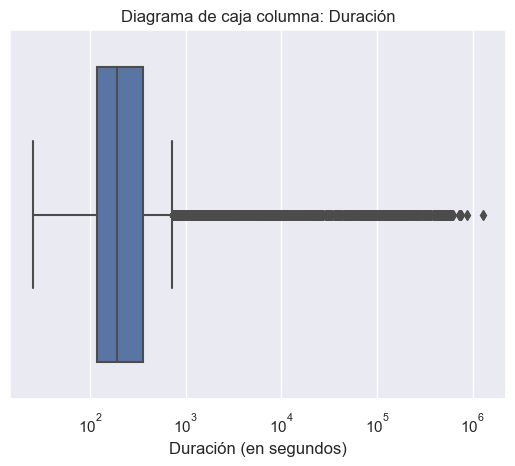

In [102]:
# Boxplot de la variable Duración:
sns.set_theme()
sns.boxplot(x='Duración (en segundos)',data=variables_cuantitativas)
plt.xscale('log')
plt.title('Diagrama de caja columna: Duración')
plt.show()

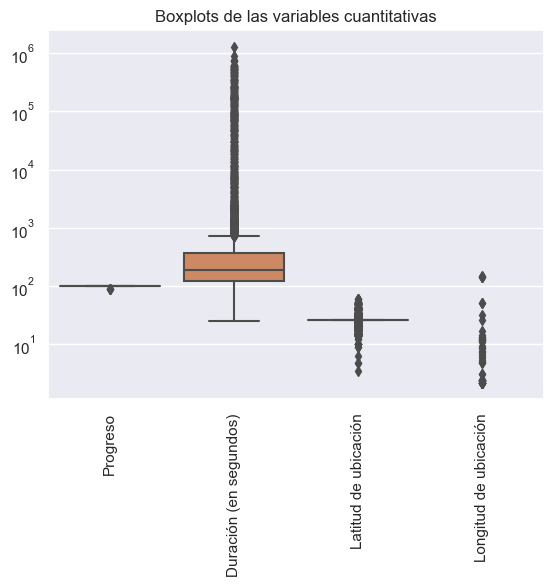

In [88]:
sns.set_theme()
sns.boxplot(variables_cuantitativas)
plt.yscale('log')
plt.title('Boxplots de las variables cuantitativas')
plt.xticks(rotation=90)
plt.show()

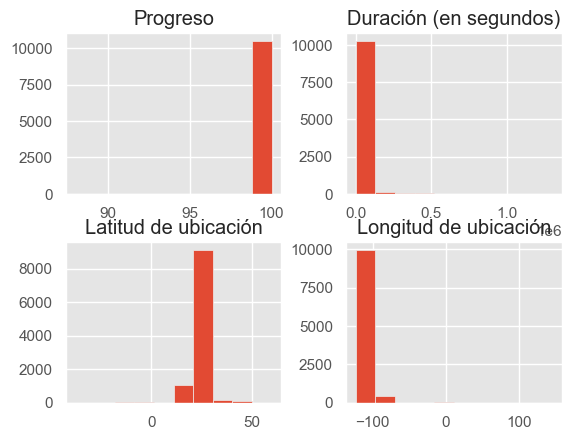

In [187]:
# Distribución de las columnas: Histograma
plt.style.use('ggplot')
variables_cuantitativas.hist()
plt.show()


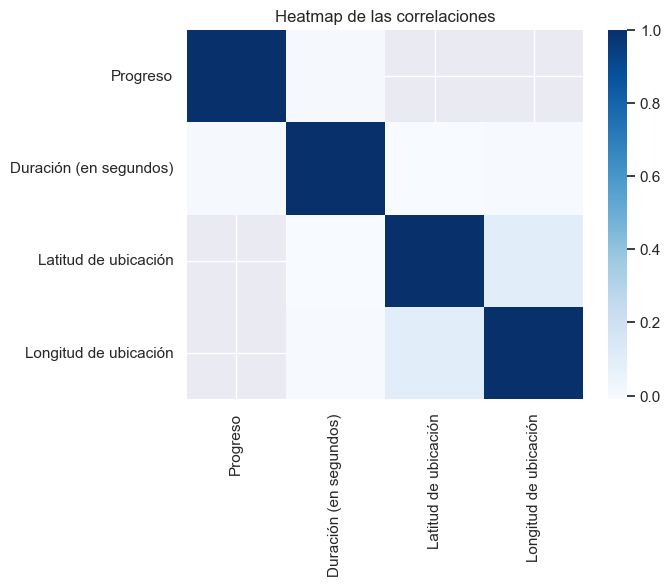

In [209]:
correlaciones = variables_cuantitativas.corr()
plt.title('Heatmap de las correlaciones')
sns.heatmap(correlaciones,cmap='Blues')
plt.show()

Variables categóricas
- Distribución de los datos (diagramas de barras, diagramas de pastel)

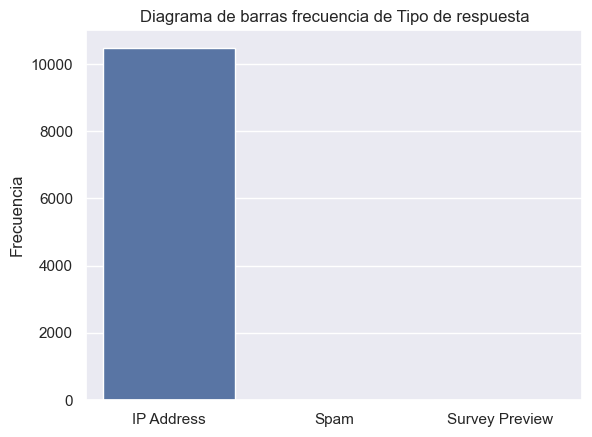

In [168]:
sns.barplot(data=dic_frecuencia['Tipo de respuesta'], x=dic_frecuencia['Tipo de respuesta'].index, y =dic_frecuencia['Tipo de respuesta']['Tipo de respuesta'])
plt.title('Diagrama de barras frecuencia de Tipo de respuesta')
plt.ylabel('Frecuencia')
plt.show()

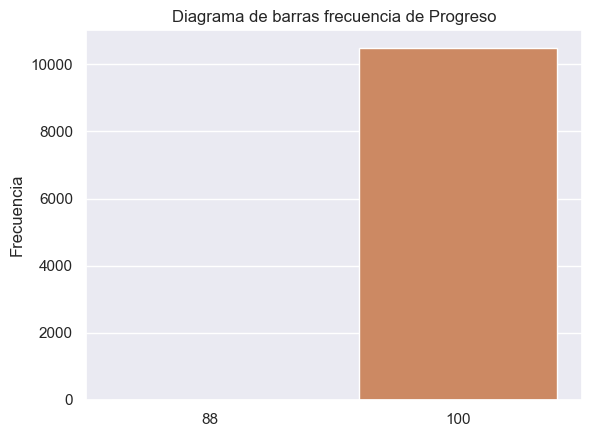

In [169]:

sns.barplot(data=dic_frecuencia['Progreso'], x=dic_frecuencia['Progreso'].index, y =dic_frecuencia['Progreso']['Progreso'])
plt.title('Diagrama de barras frecuencia de Progreso')
plt.ylabel('Frecuencia')
plt.show()


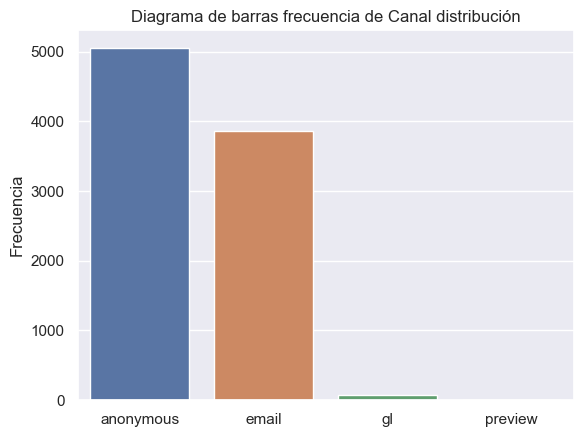

In [170]:
sns.barplot(data=dic_frecuencia['Canal de la distribución'], x=dic_frecuencia['Canal de la distribución'].index, y =dic_frecuencia['Canal de la distribución']['Canal de la distribución'])
plt.title('Diagrama de barras frecuencia de Canal distribución')
plt.ylabel('Frecuencia')
plt.show()

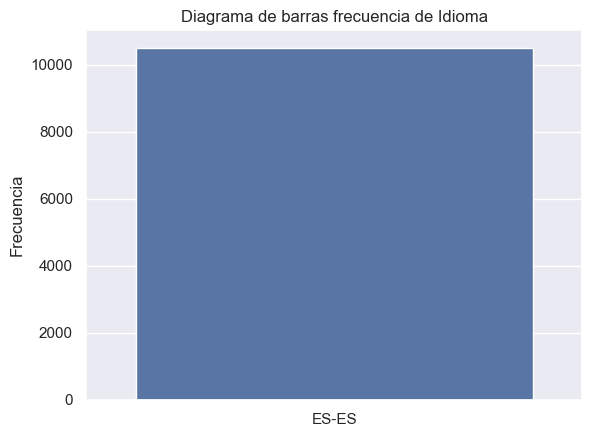

In [171]:
sns.barplot(data=dic_frecuencia['Idioma del usuario'], x=dic_frecuencia['Idioma del usuario'].index, y =dic_frecuencia['Idioma del usuario']['Idioma del usuario'])
plt.title('Diagrama de barras frecuencia de Idioma')
plt.ylabel('Frecuencia')
plt.show()

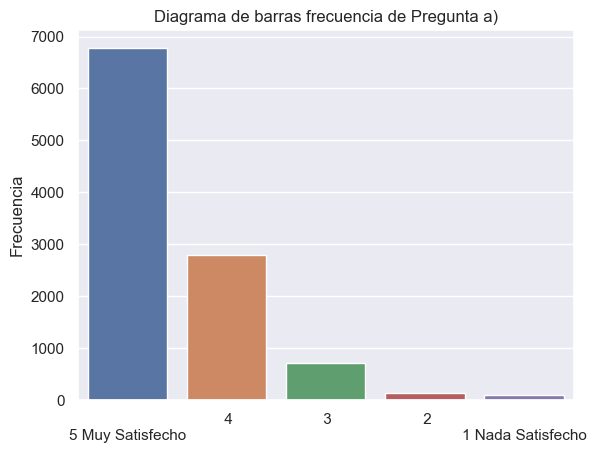

In [173]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'].index, y =dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - a) Al concluir este Proyecto Solidario.'])
plt.title('Diagrama de barras frecuencia de Pregunta a)')
plt.ylabel('Frecuencia')
plt.show()

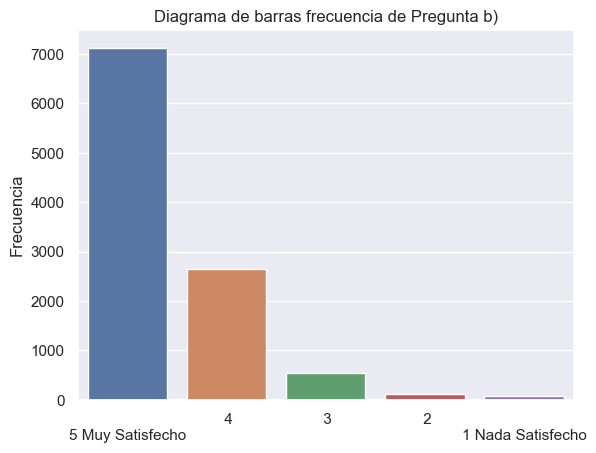

In [175]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'].index, y =dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - b) Vivir la experiencia de aprendizaje relacionada con un Objetivo de Desarrollo Sostenible.'])
plt.title('Diagrama de barras frecuencia de Pregunta b)')
plt.ylabel('Frecuencia')
plt.show()

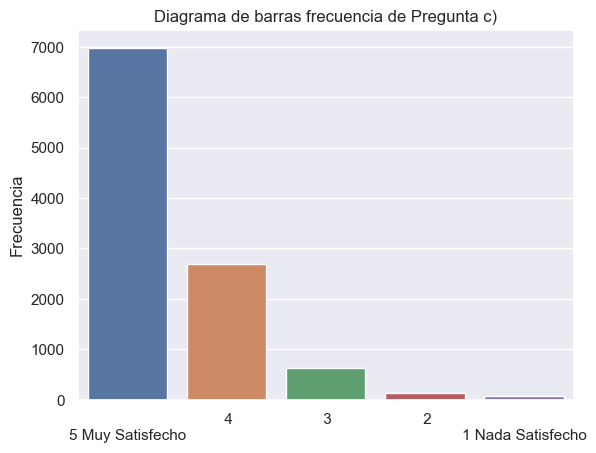

In [178]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - c) Nivel de valor aportado a la organización socio formadora a través de tus entregables'])
plt.title('Diagrama de barras frecuencia de Pregunta c)')
plt.ylabel('Frecuencia')
plt.show()

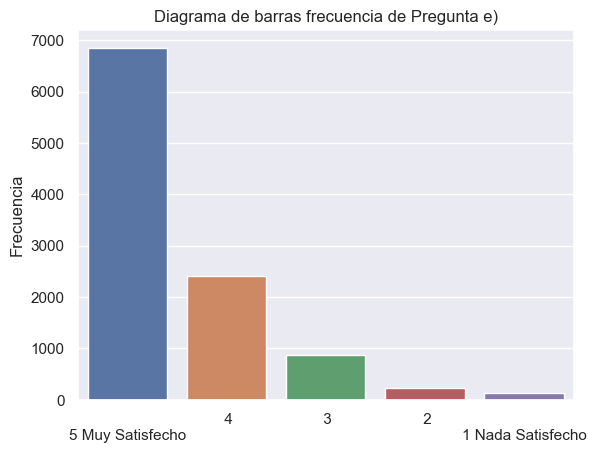

In [179]:
#sns.barplot(data=dic_frecuencia[], x=dic_frecuencia[].index, y=dic_frecuencia[][])
#plt.title('Diagrama de barras frecuencia de Pregunta e)')
#plt.ylabel('Frecuencia')
#plt.show()

sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - e) Momentos de interacción y escucha con los beneficiarios/destinatarios del proyecto'])
plt.title('Diagrama de barras frecuencia de Pregunta e)')
plt.ylabel('Frecuencia')
plt.show()




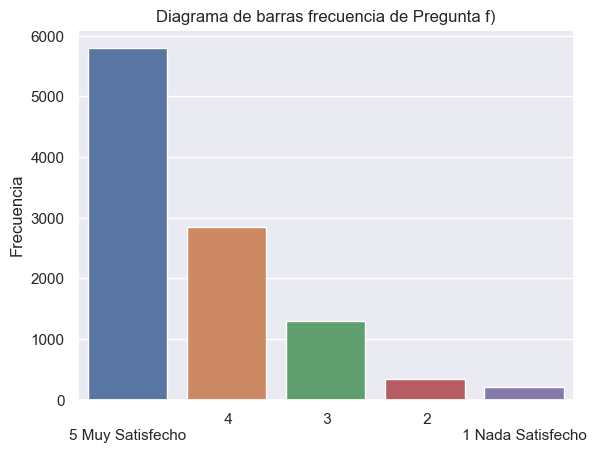

In [180]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - f)  Herramientas que aplicaste como las actividades, reportes, "quizzes", dentro de la plataforma de CANVAS en el desarrollo de la experiencia de Servicio Social.'])
plt.title('Diagrama de barras frecuencia de Pregunta f)')
plt.ylabel('Frecuencia')
plt.show()


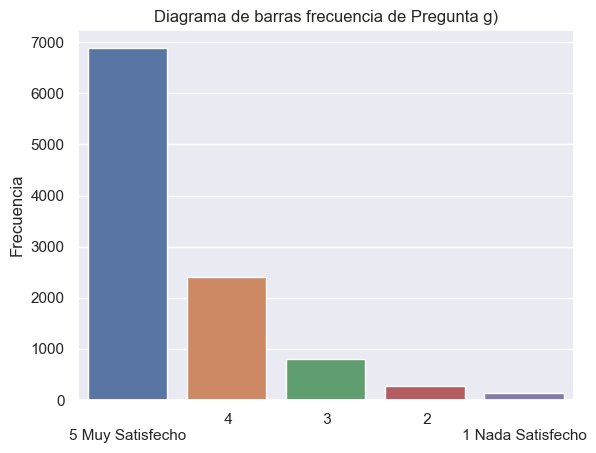

In [181]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - g) Experiencia de colaboración con la organización socio formadora'])
plt.title('Diagrama de barras frecuencia de Pregunta g)')
plt.ylabel('Frecuencia')
plt.show()

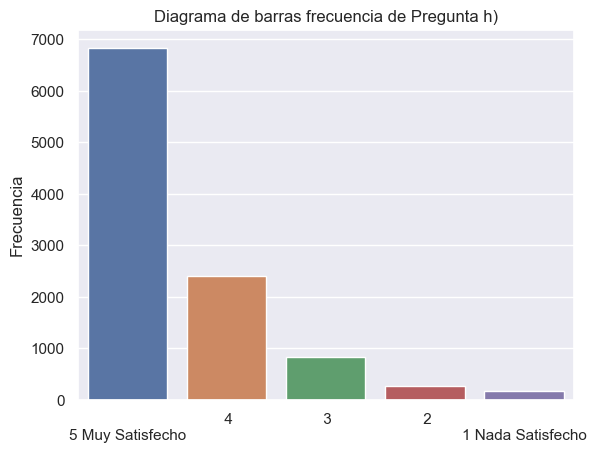

In [182]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - h) Seguimiento y liderazgo de la organización socio formadora'])
plt.title('Diagrama de barras frecuencia de Pregunta h)')
plt.ylabel('Frecuencia')
plt.show()

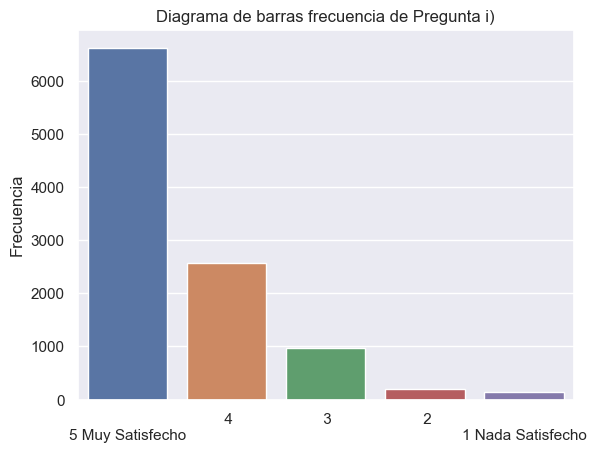

In [183]:
sns.barplot(data=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'], x=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'].index, y=dic_frecuencia['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)']['1. Evalúa tu nivel satisfacción en los siguientes aspectos: - i) Atención y servicio del área que administra el Servicio Social en el campus (asesoría y orientación, información puntual, atención de dudas, seguimiento de incidentes)'])
plt.title('Diagrama de barras frecuencia de Pregunta i)')
plt.ylabel('Frecuencia')
plt.show()

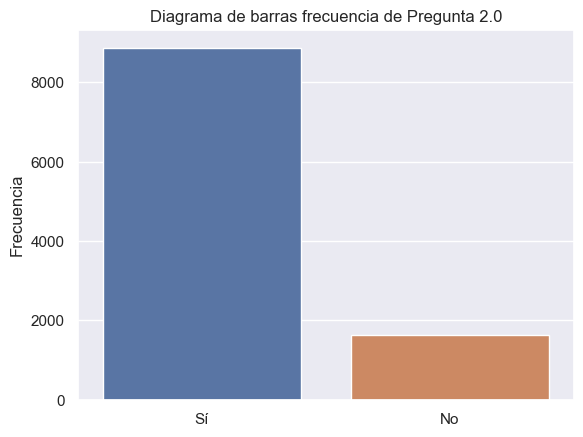

In [184]:
sns.barplot(data=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'], x=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'].index, y=dic_frecuencia['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?']['2. La Organización Socio Formadora ¿ofreció retroalimentación sobre el desarrollo del Proyecto Solidario y tu desempeño?'])
plt.title('Diagrama de barras frecuencia de Pregunta 2.0')
plt.ylabel('Frecuencia')
plt.show()

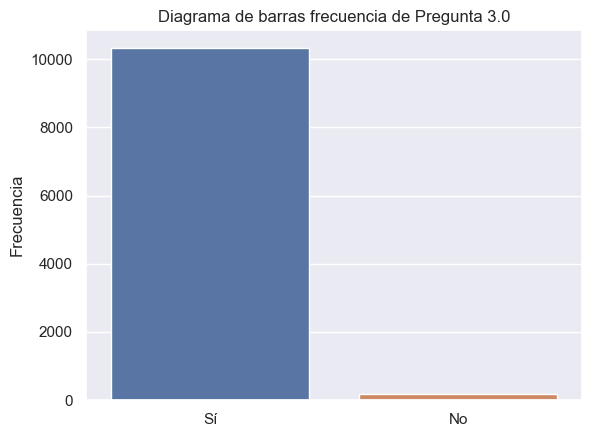

In [185]:
sns.barplot(data=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?'], x=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?'].index, y=dic_frecuencia['3. ¿Consideras interesante la causa social del socio formador?']['3. ¿Consideras interesante la causa social del socio formador?'])
plt.title('Diagrama de barras frecuencia de Pregunta 3.0')
plt.ylabel('Frecuencia')
plt.show()


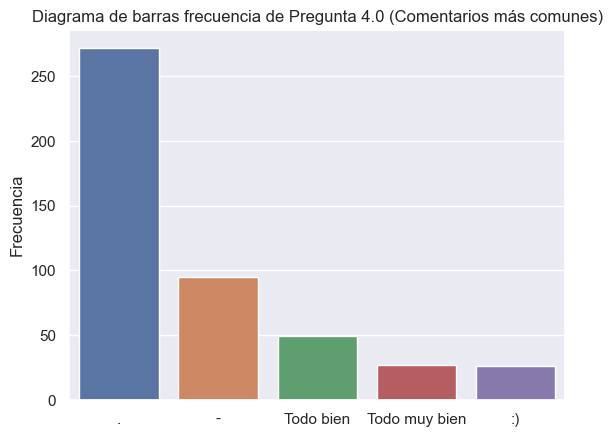

In [193]:
sns.barplot(data=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head(), x=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head().index, y=dic_frecuencia['4. Escribe algún comentario que te interese compartir con la organización socio formadora:']['4. Escribe algún comentario que te interese compartir con la organización socio formadora:'].head())
plt.title('Diagrama de barras frecuencia de Pregunta 4.0 (Comentarios más comunes)' )
plt.ylabel('Frecuencia')
plt.show()

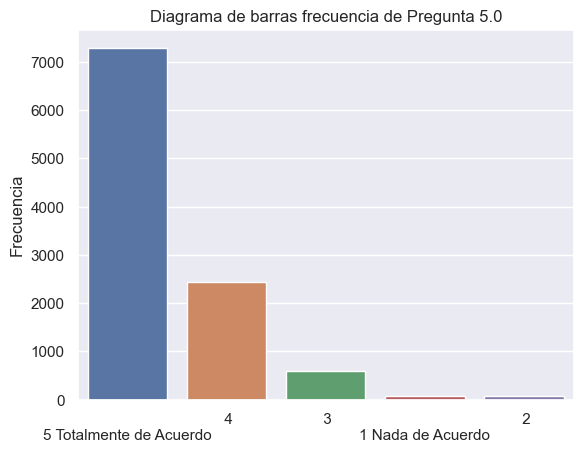

In [194]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - a) Ser sensible ante la vulnerabilidad, el dolor y el sufrimiento del otro y actuar con el fin de eliminarlo, aliviarlo o evitarlo, a través de acciones justas alejadas de la pasión egoísta y/o de sentimientos de superioridad'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.0')
plt.ylabel('Frecuencia')
plt.show()


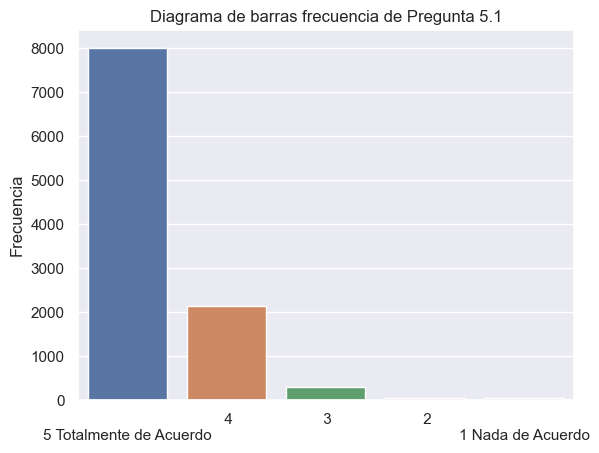

In [195]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - b) Actuar con responsabilidad, con el fin de asegurar el bienestar de la colectividad, a través de acciones que garantizan el acceso a los derechos humanos, el empoderamiento de los ciudadanos y de las comunidades, así como el cuidado, mantenimiento y uso sostenible de los recursos y bienes comunes'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.1')
plt.ylabel('Frecuencia')
plt.show()

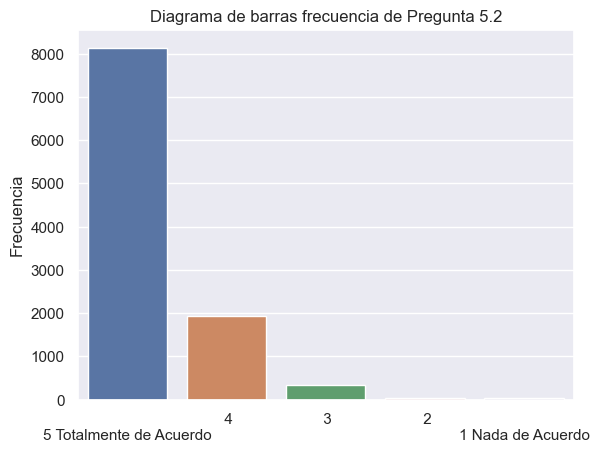

In [196]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - c) Actuar con respeto ante la diversidad de género, sexual, étnica, cultural, de capacidades, generacional, religiosa y socioeconómica mostrando una cordial aceptación de las diferencias y la capacidad para gestionar de manera razonable los conflictos'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.2')
plt.ylabel('Frecuencia')
plt.show()

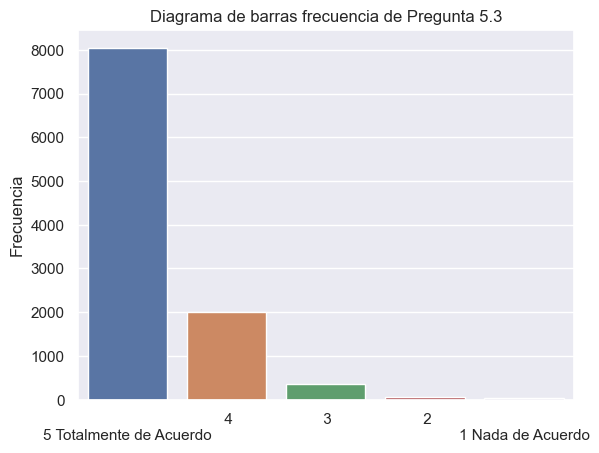

In [197]:
sns.barplot(data=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'], x=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'].index, y=dic_frecuencia['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia']['5. Expresa tu opinión en los siguientes enunciados, en esta experiencia de servicio social tuve la oportunidad de: - e) Promover soluciones cooperativas en problemas o coordinar acciones colectivas con el fin de mejorar la calidad de vida de la sociedad, fomentando la cultura de la legalidad, los derechos humanos y/o el fortalecimiento de la democracia'])
plt.title('Diagrama de barras frecuencia de Pregunta 5.3')
plt.ylabel('Frecuencia')
plt.show()

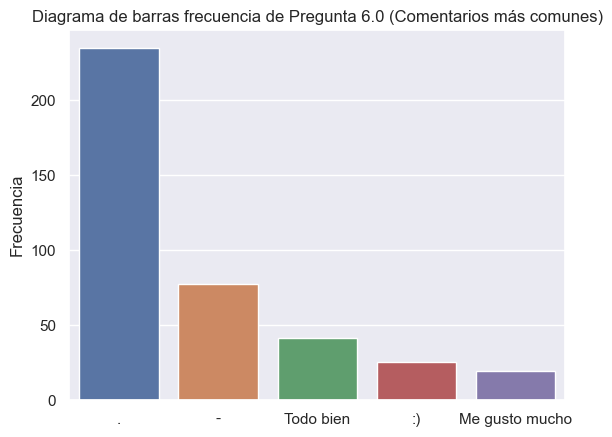

In [200]:
sns.barplot(data=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head(), x=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head().index, y=dic_frecuencia['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:']['6. Comparte algo en particular sobre la experiencia de servicio social que acabas de vivir. Nos interesa conocer tu opinión:'].head())
plt.title('Diagrama de barras frecuencia de Pregunta 6.0 (Comentarios más comunes)')
plt.ylabel('Frecuencia')
plt.show()

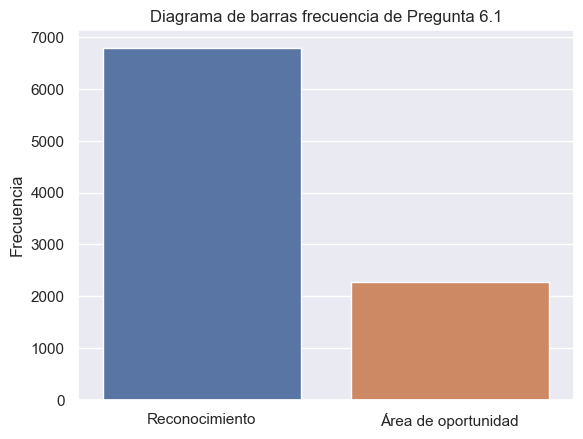

In [202]:
sns.barplot(data=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:'], x=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:'].index, y=dic_frecuencia['6.1 Tu comentario sobre la experiencia es:']['6.1 Tu comentario sobre la experiencia es:'])
plt.title('Diagrama de barras frecuencia de Pregunta 6.1')
plt.ylabel('Frecuencia')
plt.show()


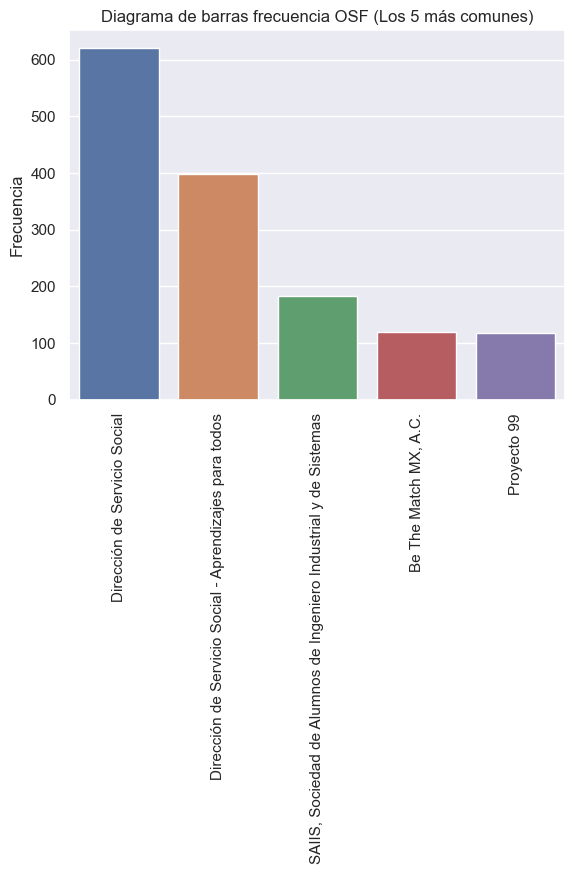

In [206]:

sns.barplot(data=dic_frecuencia['OSF'].head(), x=dic_frecuencia['OSF'].head().index, y=dic_frecuencia['OSF']['OSF'].head())
plt.title('Diagrama de barras frecuencia OSF (Los 5 más comunes)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

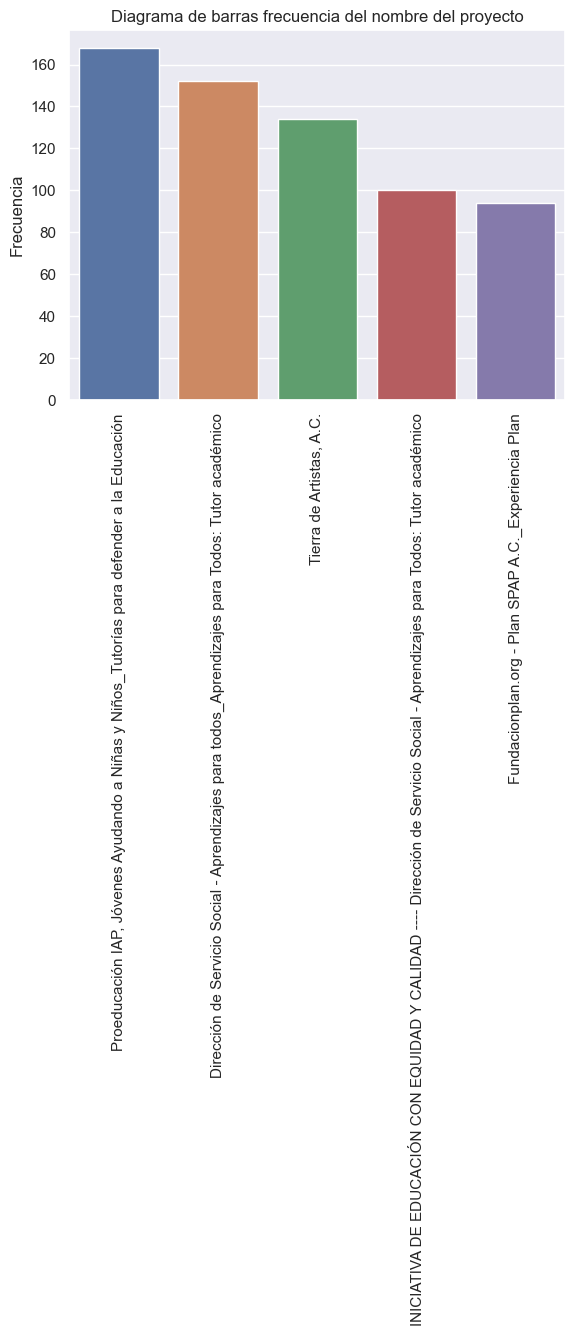

In [209]:
sns.barplot(data=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head(), x=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head().index, y=dic_frecuencia['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:']['Selecciona la Organización Socioformadora y el nombre del proyecto en el que participaste:'].head())
plt.title('Diagrama de barras frecuencia del nombre del proyecto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


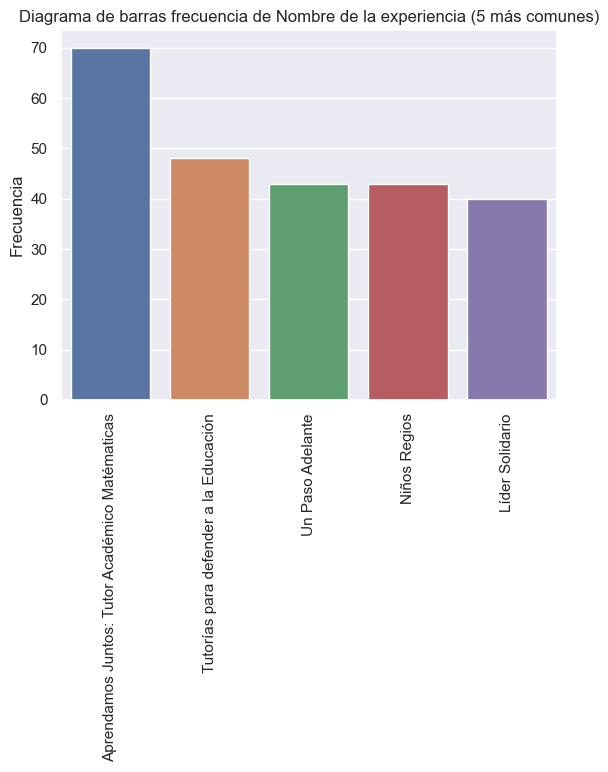

In [213]:
sns.barplot(data=dic_frecuencia['Nombre de Experiencia'].head(), x=dic_frecuencia['Nombre de Experiencia'].head().index, y=dic_frecuencia['Nombre de Experiencia']['Nombre de Experiencia'].head())
plt.title('Diagrama de barras frecuencia de Nombre de la experiencia (5 más comunes)')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.show()


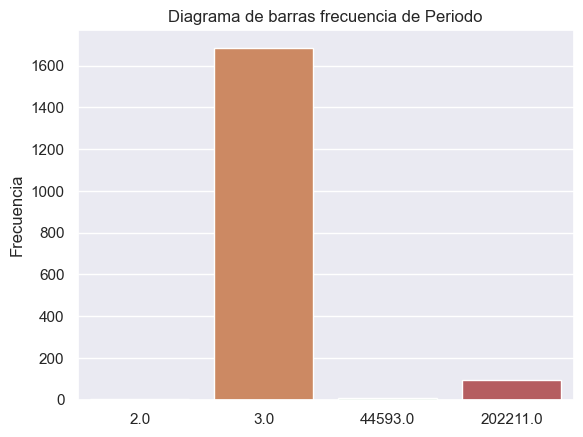

In [214]:
sns.barplot(data=dic_frecuencia['Periodo'], x=dic_frecuencia['Periodo'].index, y=dic_frecuencia['Periodo']['Periodo'])
plt.title('Diagrama de barras frecuencia de Periodo')
plt.ylabel('Frecuencia')
plt.show()

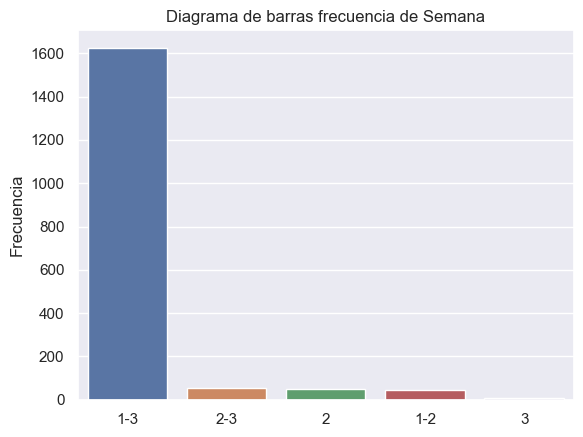

In [215]:
sns.barplot(data=dic_frecuencia['Semana'], x=dic_frecuencia['Semana'].index, y=dic_frecuencia['Semana']['Semana'])
plt.title('Diagrama de barras frecuencia de Semana')
plt.ylabel('Frecuencia')
plt.show()


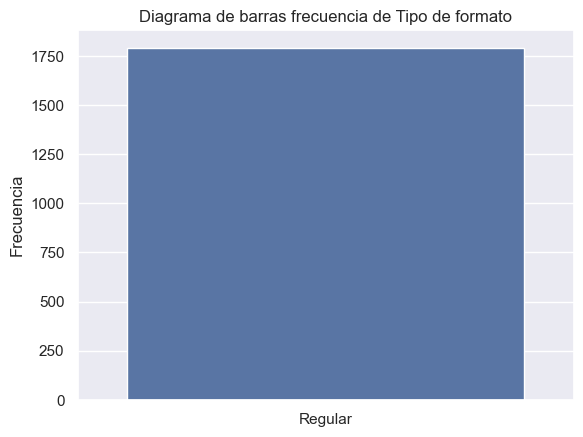

In [216]:
sns.barplot(data=dic_frecuencia['Tipo de Formato'], x=dic_frecuencia['Tipo de Formato'].index, y=dic_frecuencia['Tipo de Formato']['Tipo de Formato'])
plt.title('Diagrama de barras frecuencia de Tipo de formato')
plt.ylabel('Frecuencia')
plt.show()


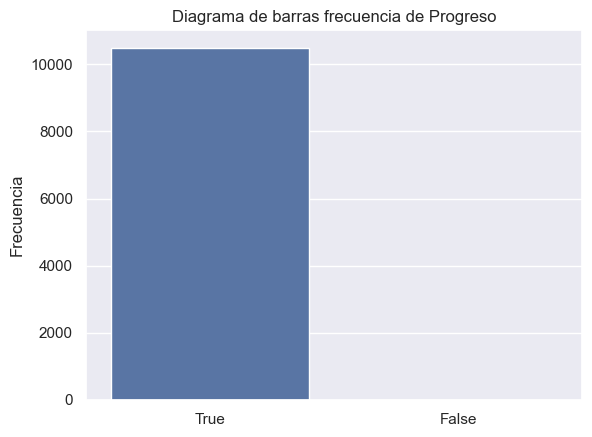

In [244]:
sns.barplot(data=dic_frecuencia['Finalizado'], x=['True','False'], y =dic_frecuencia['Finalizado']['Finalizado'])
plt.title('Diagrama de barras frecuencia de Progreso')
plt.ylabel('Frecuencia')
plt.show()
